In [66]:

data_dir ="/home/tarkus/Desktop/WILDS/paper_2022/train_classifiers/DomainBed/features"

# Directory of Model weights
model_dir = data_dir

In [67]:

import torch
from competence_estimation.metrics import compute_metric
from competence_estimation.utils import load_data

import time
import  matplotlib.pyplot as  plt
import numpy as np

import pickle
results =  {}
results_scores = {}
with open('results/results.pickle', 'rb') as handle:
    results = pickle.load(handle)
    
with open('results/results_scores.pickle', 'rb') as handle:
    results_scores = pickle.load(handle)
print('keys' ,  results.keys())

datasets = [ 'PACS','OfficeHome','TerraIncognita', 'VLCS']
#algorithms=['ERM', 'Clip_Nonlinear' ,'SD']

#score_functions=[ 'max_softmax', 'max_logit', 'energy',  'knn',  'vim', 'GMM']#,'HBOS']
algorithms=['ERM', 'Clip_Nonlinear' ,'SD', 'Mixup', 'SagNet',  'SwinTransformer', 'Fish', 'VisionTransformer', 'GroupDRO', 'VREx'  ]

score_functions=[ 'vim','max_softmax', 'max_logit', 'energy', 'energy_react', 'HBOS',   'knn',   'GMM']#,'HBOS']
percentages = [0.0, 0.05, 0.1,0.15, 0.2, 0.25]


ENVS_DIC = {'OfficeHome':4, 'VLCS':4, 'PACS': 4, 'TerraIncognita': 4, 'SVIRO':10, 'DomainNet': 6}


keys dict_keys(['knn', 'max_softmax', 'vim', 'energy', 'GMM', 'energy_react', 'HBOS', 'mahalanobis', 'PCA', 'max_logit'])


In [68]:
print(results['energy'].keys())

dict_keys(['PACS', 'VLCS', 'OfficeHome', 'TerraIncognita', 'DomainNet'])


In [69]:
import seaborn as sns
import pandas as pd
%matplotlib inline


d = {}

d['score_function'] = []
d['dataset'] = []
d['algorithm'] = []
d['test_domain'] = []
d['acc_drop']  = []
d['percentage'] = []
p=0.0

for k in  results[score_functions[0]][datasets[0]][algorithms[0]][0][percentages[0]].keys():
    d[k] = []
    print(k)

d['ausc_alpha_ood_shifted_mean'] = []#.append(result['ausc_alpha_ood_test_shifted'])
d['ausc_fracs_shifted_mean'] = []#.append(result['ausc_fracs_ood_test_shifted'])

d['ausc_ece_ood_alpha_shifted_mean'] = []#.append(result['ausc_alpha_ece_ood_test_shifted'])
d['ausc_ece_ood_fracs_shifted_mean'] = []#.append(

for p in percentages:

    for dataset in datasets:
        for test_domain in  range(ENVS_DIC[dataset]):
            
            mean_fracs = 0
            mean_alpha = 0
            mean_ece = 0
            mean_ece_fracs = 0

            for algorithm in algorithms:
                
                for score_function_name in score_functions:
                    
                    result = results[score_function_name][dataset][algorithm][test_domain][p]#(results[conf_key][score_function][dataset][alg_cons][test_domain][p]

                    d['dataset'].append(dataset)
                    d['algorithm'].append(algorithm)
                    d['test_domain'].append(test_domain)

                    d['percentage'].append(p)
                    
                    d['score_function'].append(score_function_name)
                    for k in  results[score_function_name][dataset][algorithm][test_domain][p].keys():
                        d[k].append(result[k])
             
                    d['acc_drop'].append(result['acc_ood_test']-result['acc_iid_test'] )
                    
                    mean_alpha += d['ausc_alpha_ood_test_shifted'][-1]
                    mean_ece += d['ausc_alpha_ece_ood_test_shifted'][-1]
                    mean_fracs += d['ausc_fracs_ood_test_shifted'][-1]
                    mean_ece_fracs += d['ausc_fracs_ece_ood_test_shifted'][-1]

                    d['ausc_alpha_ood_shifted_mean'].append(result['ausc_alpha_ood_test_shifted'])
                    d['ausc_fracs_shifted_mean'].append(result['ausc_fracs_ood_test_shifted'])

                    d['ausc_ece_ood_alpha_shifted_mean'].append(result['ausc_alpha_ece_ood_test_shifted'])
                    d['ausc_ece_ood_fracs_shifted_mean'].append(result['ausc_fracs_ece_ood_test_shifted'])

                mean_alpha /=len(score_functions)
                mean_ece /=len(score_functions)
                mean_fracs /=len(score_functions)
                mean_ece_fracs /= len(score_functions)
                for e, _ in enumerate(score_functions):
                    d['ausc_alpha_ood_shifted_mean'][-e-1] -= mean_alpha
                    d['ausc_ece_ood_alpha_shifted_mean'][-e-1] -= mean_ece
                    d['ausc_fracs_shifted_mean'][-e-1] -= mean_fracs
                    d['ausc_ece_ood_fracs_shifted_mean'][-e-1] -= mean_ece_fracs

            #print(mean)    
            
df = pd.DataFrame(data=d)
print(len(df))

acc_ood_test
acc_iid_test
acc_iid_val
ece_ood_test
ece_iid_test
ece_iid_val
ausc_alpha_ece_ood_test
ausc_alpha_ece_iid_test
ausc_alpha_ece_ood_test_shifted
ausc_alpha_ece_iid_test_shifted
ausc_fracs_ece_ood_test
ausc_fracs_ece_iid_test
ausc_fracs_ece_ood_test_shifted
ausc_fracs_ece_iid_test_shifted
ausc_alpha_ood_test
ausc_alpha_iid_test
ausc_alpha_ood_test_shifted
ausc_alpha_iid_test_shifted
ausc_fracs_ood_test
ausc_fracs_iid_test
ausc_fracs_ood_test_shifted
ausc_fracs_iid_test_shifted
intersection_fraction_ood_test
intersection_alpha_ood_test
intersection_fraction_iid_test
intersection_alpha_iid_test
frac_remaining_ood_test
frac_remaining_iid_test
7680


In [47]:
df_save = df[['dataset', 'algorithm',  'percentage', 'algorithm', 'score_function','ausc_alpha_ood_test_shifted','ausc_fracs_ood_test', 'ausc_alpha_ece_ood_test_shifted','ausc_fracs_ece_ood_test'   ]]
df_save.to_csv('results_percentage.csv', index=False)

In [36]:
#pd.read_csv('results_percentage.csv')

In [37]:
# ANOVA Stuff
results = {}



import pickle
with open('results_percentages.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
np.arange(np.array([0.0,0.1]))
print(percentages)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# AUSC Alpha

Text(0.5, 1.0, 'AUSC')

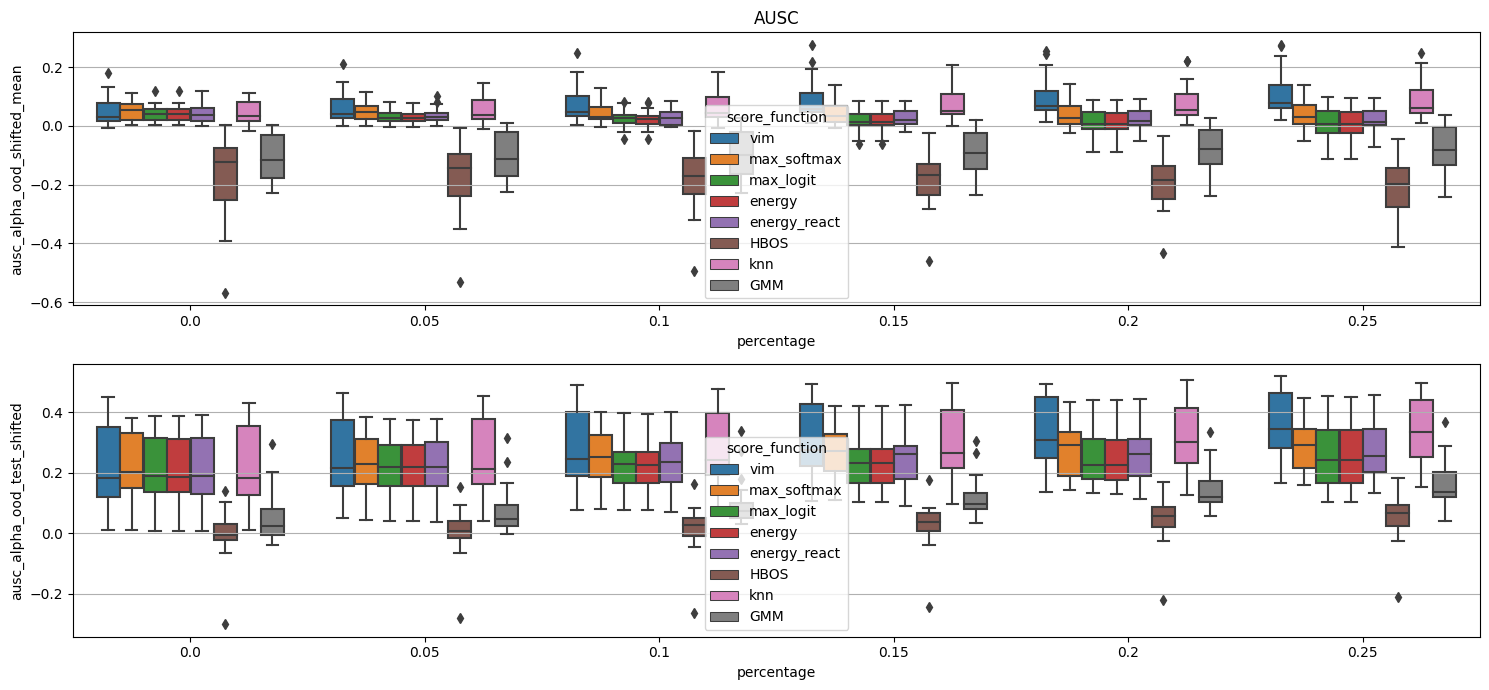

In [70]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 7),
    tight_layout = True)
df = df[df['algorithm'] == 'ERM']

sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_shifted_mean", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot(np.array(percentages), np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_test_shifted", hue='score_function', ax=ax[1])
ax[1].grid(axis='y')

#sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_test", hue='score_function', ax=ax[2])


ax[0].set_title("AUSC")

In [30]:
## Curve

<AxesSubplot: xlabel='percentage', ylabel='ausc_alpha_ood_test_shifted'>

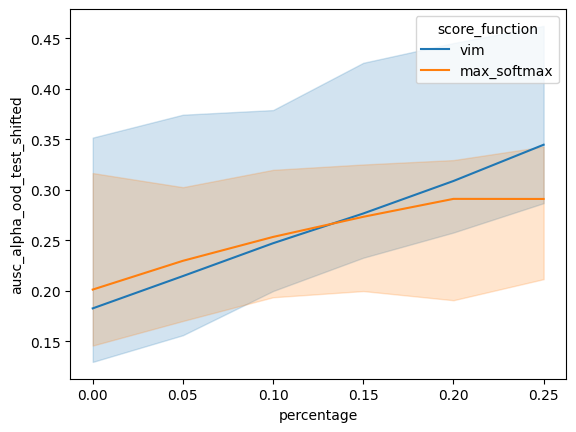

In [31]:

df_cond = df[df['score_function'].isin(['max_softmax', 'vim'])]

sns.lineplot(data=df_cond, x="percentage", y="ausc_alpha_ood_test_shifted", hue="score_function", estimator='median')


In [18]:
for p in percentages:
    for dataset in datasets:
        for test_domain in  range(ENVS_DIC[dataset]):
            for algorithm in algorithms:
                
                for score_function_name in score_functions:
                    df_cond = df[df['score_function'] == score_function_name]
                    

Text(0.5, 1.0, 'AUSC')

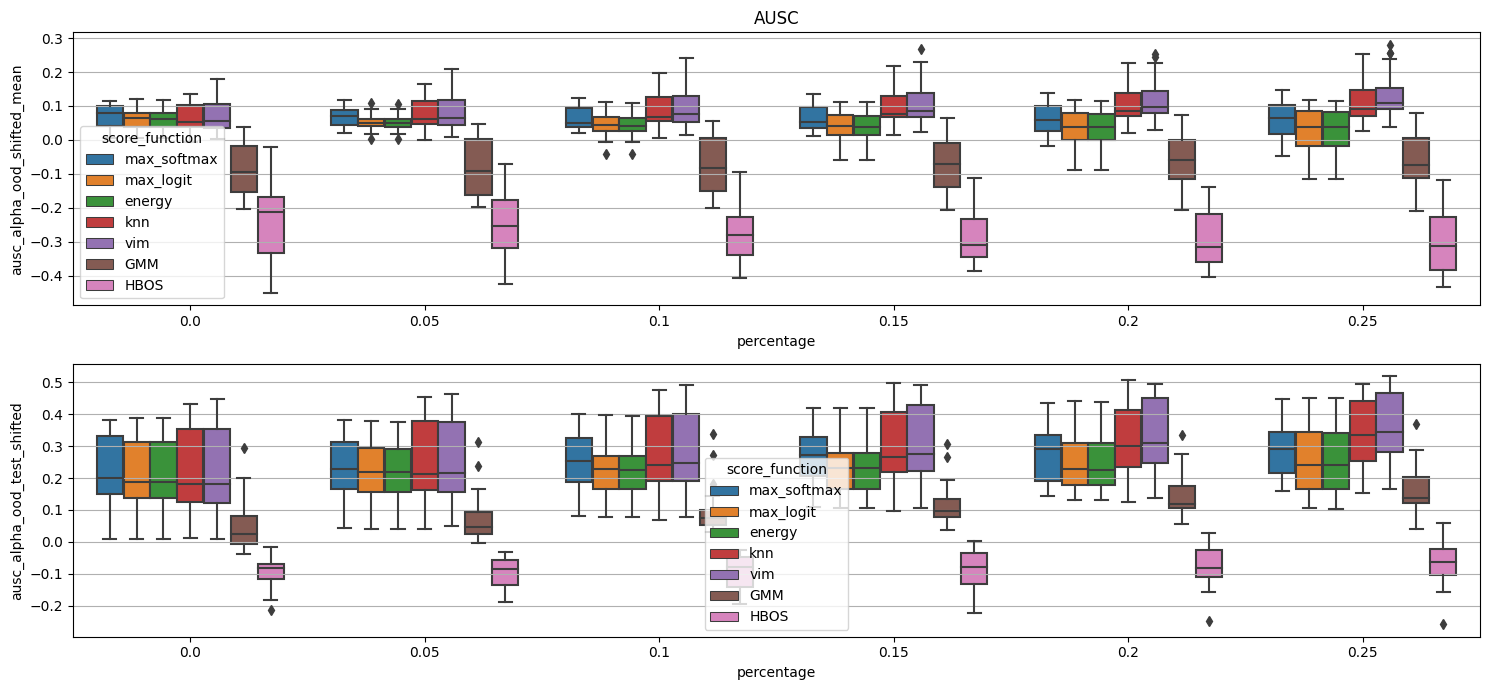

In [19]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 7),
    tight_layout = True)
#df = df[df['algorithm'] == 'ERM']

sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_shifted_mean", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot(np.array(percentages), np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_test_shifted", hue='score_function', ax=ax[1])
ax[1].grid(axis='y')

#sns.boxplot(data=df, x="percentage", y="ausc_alpha_ood_test", hue='score_function', ax=ax[2])


ax[0].set_title("AUSC")

### AUSC Fracs

Text(0.5, 1.0, 'AUSC')

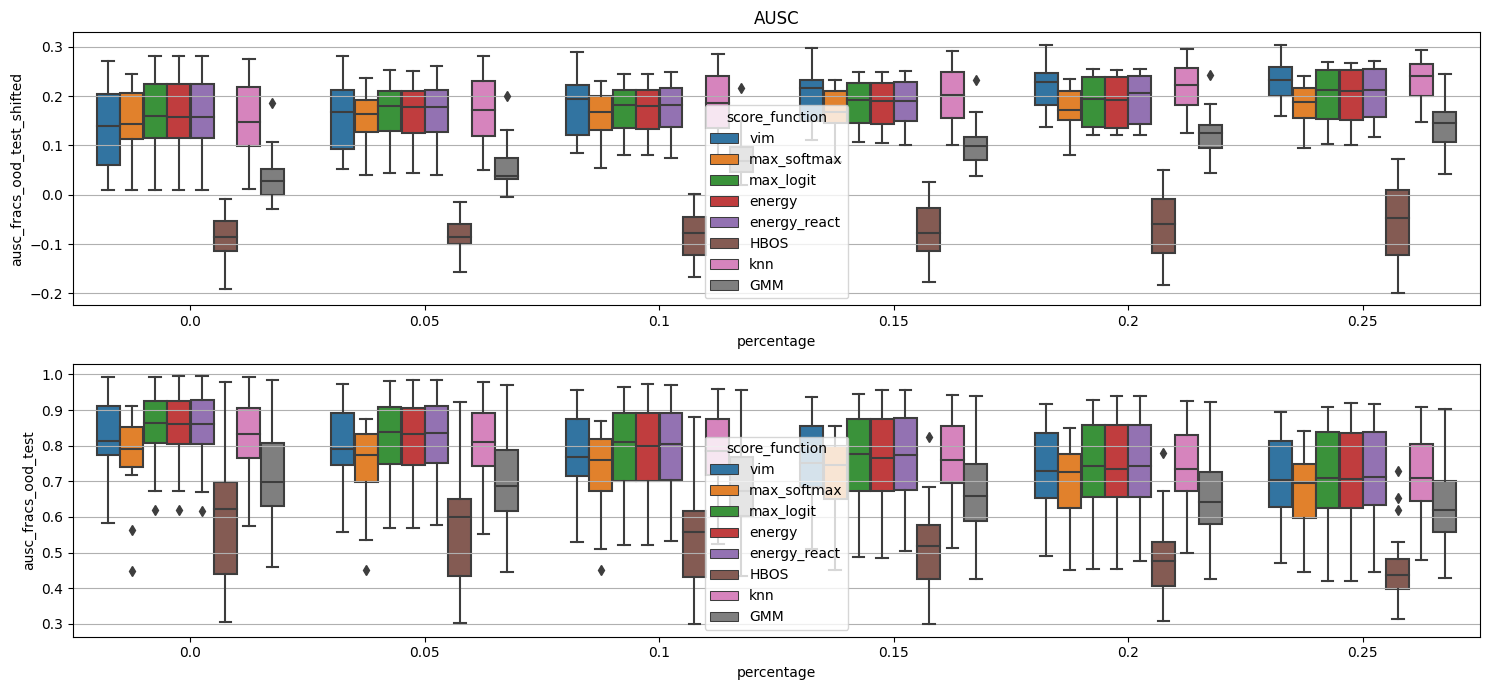

In [32]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 7),
    tight_layout = True)
sns.boxplot(data=df, x="percentage", y="ausc_fracs_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot(np.array, np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_fracs_ood_test", hue='score_function', ax=ax[1])
ax[1].grid(axis='y')

#sns.boxplot(data=df, x="percentage", y="ausc_fracs_ood_test", hue='score_function', ax=ax[2])

ax[0].set_title("AUSC")

## ECE Alpha

Text(0.5, 1.0, 'AUSC')

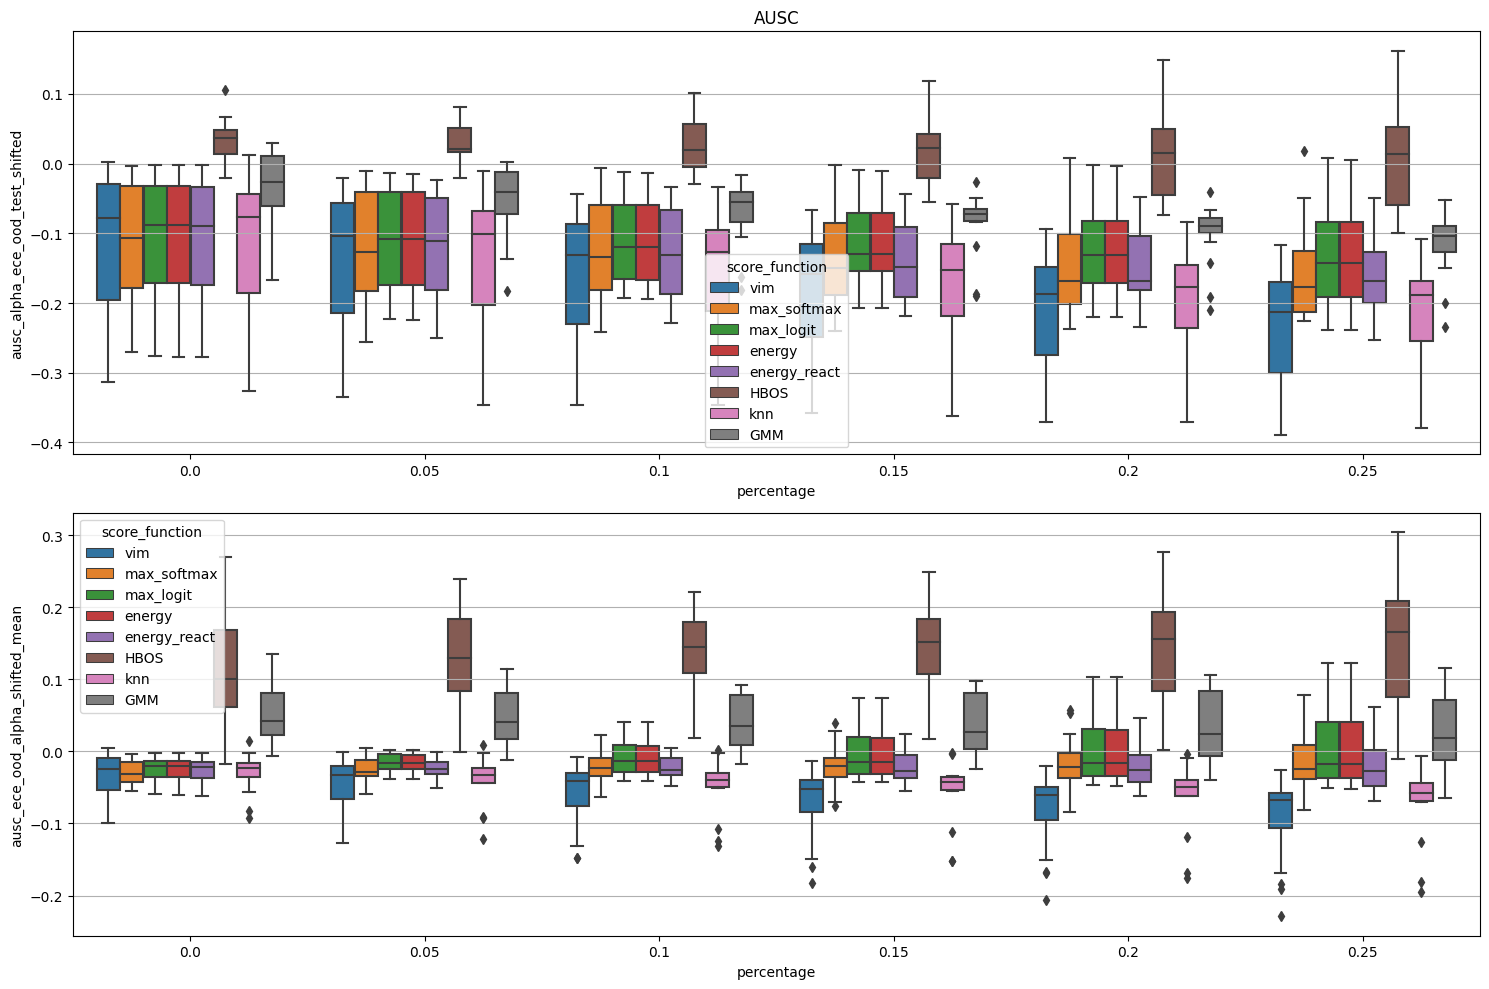

In [33]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 10),
    tight_layout = True)

sns.boxplot(data=df, x="percentage", y="ausc_alpha_ece_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot([0,1,2,3,4,5], np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_ece_ood_alpha_shifted_mean", hue='score_function', ax=ax[1])

ax[1].grid(axis='y')

ax[0].set_title("AUSC")

## ECE Fracs

Text(0.5, 1.0, 'AUSC')

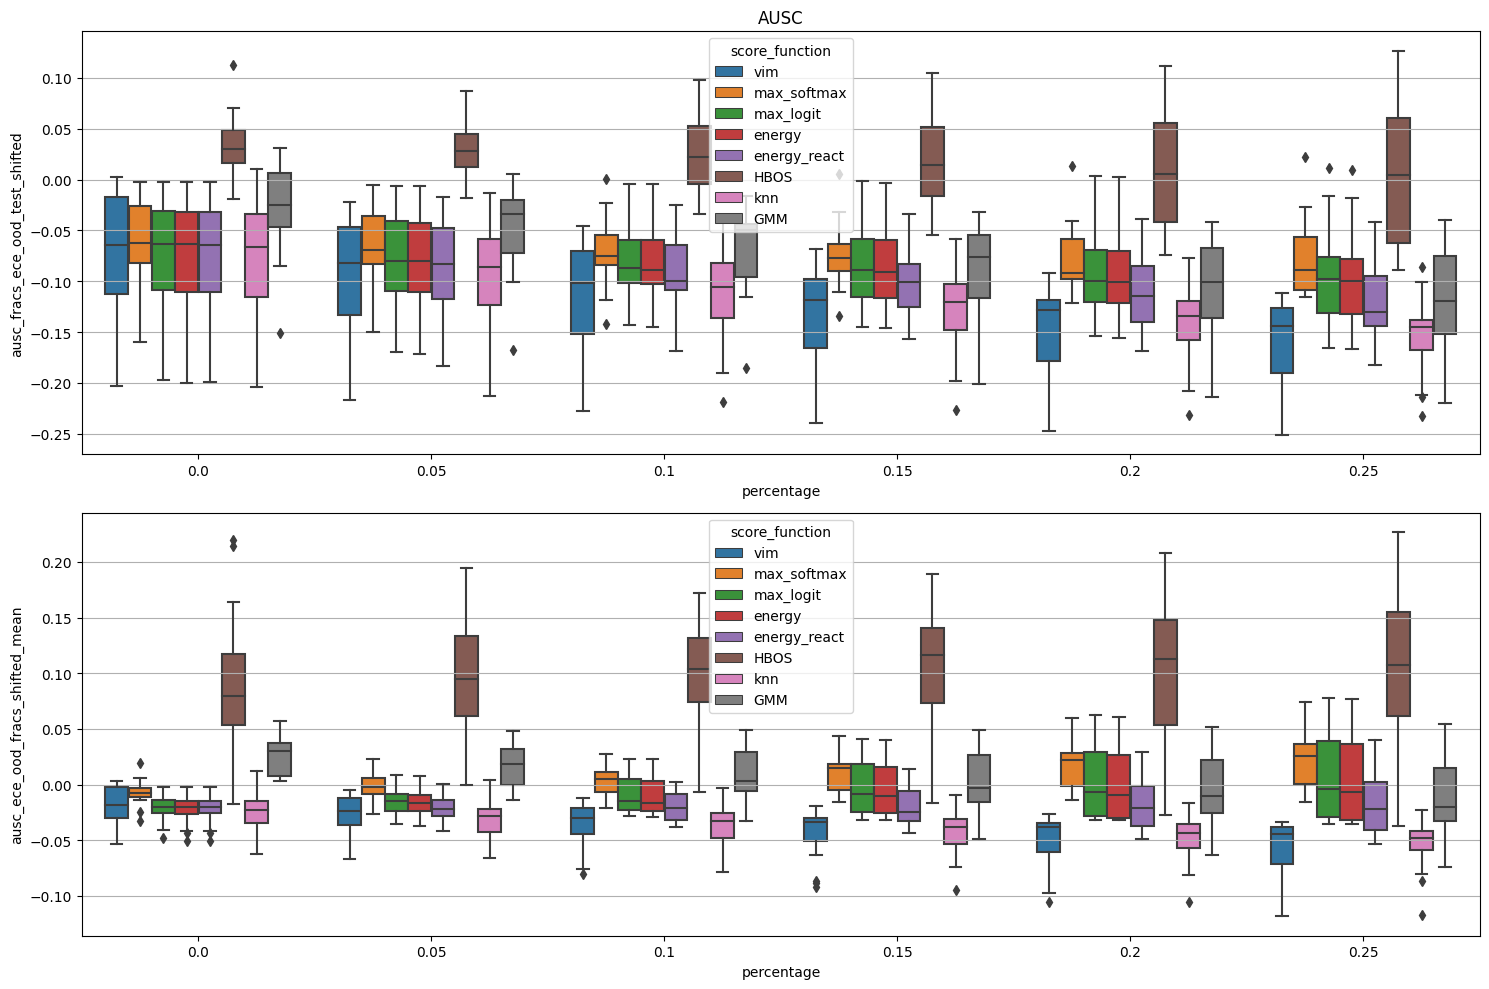

In [34]:
fig, ax = plt.subplots(2, 1,
    figsize =(15, 10),
    tight_layout = True)

sns.boxplot(data=df, x="percentage", y="ausc_fracs_ece_ood_test_shifted", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')
#ax[0].plot([0,1,2,3,4,5], np.array(percentages)+0.15 )
sns.boxplot(data=df, x="percentage", y="ausc_ece_ood_fracs_shifted_mean", hue='score_function', ax=ax[1])

ax[1].grid(axis='y')

ax[0].set_title("AUSC")

#  Fraacs Remaining

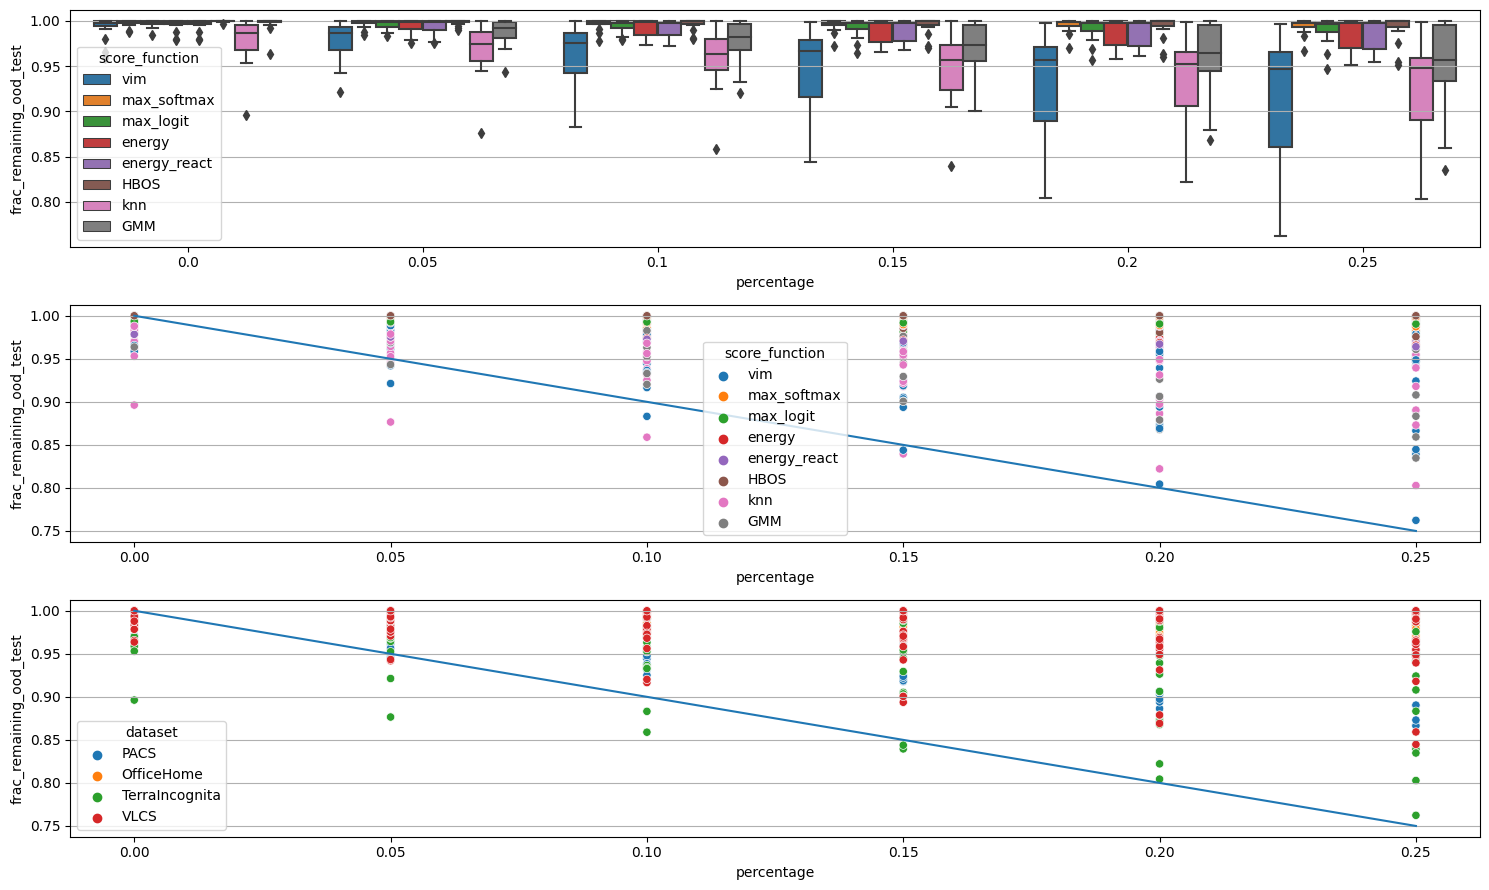

In [36]:
fig, ax = plt.subplots(3, 1,
    figsize =(15, 9),
    tight_layout = True)

sns.boxplot(data=df, x="percentage", y="frac_remaining_ood_test", hue='score_function', ax=ax[0])
ax[0].grid(axis='y')

sns.scatterplot(data=df, x="percentage", y="frac_remaining_ood_test", hue='score_function', ax=ax[1])
ax[1].plot(percentages, 1-np.array(percentages))
ax[1].grid(axis='y')

sns.scatterplot(data=df, x="percentage", y="frac_remaining_ood_test", hue='dataset', ax=ax[2])
ax[2].plot(percentages, 1-np.array(percentages))
ax[2].grid(axis='y')

# Histogram  Plots:  IID vs. OOD vs. Open-World

0 0 0
2048 2730
torch.Size([794])
0 1 0
2048 2730
torch.Size([794])
0 2 0
2048 2730
torch.Size([794])
0 3 0
2048 2730
torch.Size([794])


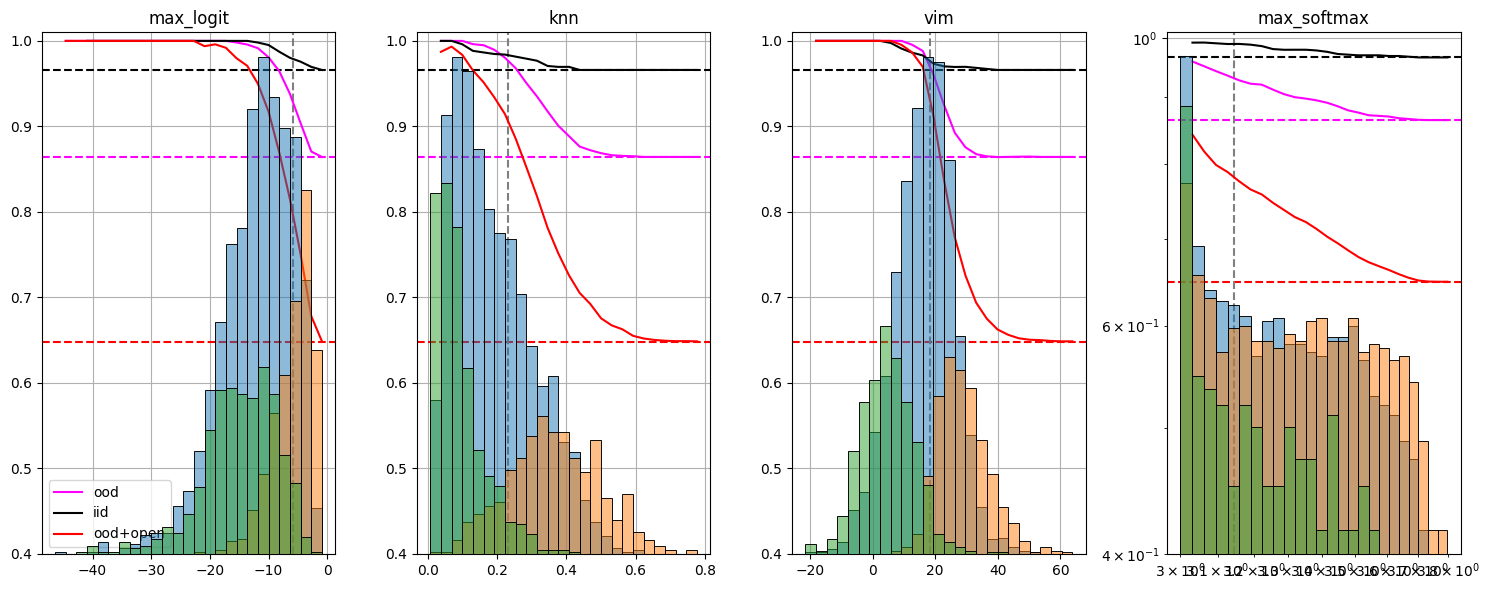

In [72]:
from competence_estimation.metrics import compute_curves
from competence_estimation.utils import mix_open

score_functions = ['max_logit', 'knn', 'vim','max_softmax']#, 'HBOS']

fig, ax = plt.subplots(1, len(score_functions),
    figsize =(15, 6),
    tight_layout = True)

test_domain = 2
dataset='PACS'
algorithm = 'ERM'

for test_domain in range(1):

    for ep, p in  enumerate([0.25]):
        for ec, score_function_name in enumerate(score_functions):
            ax2 = ax[ ec].twinx()
            print(ep,ec, test_domain)
            result = results_scores[score_function_name][dataset][algorithm][test_domain][p]
            scores_ood = result['scores_ood_test']
            scores_iid_val =  result['scores_iid_val']
            scores_iid_test =  result['scores_iid_test']
            
            if score_function_name  == 'max_softmax':
                scores_ood +=2
                scores_iid_val +=2
                scores_iid_test +=2

            n  = scores_ood.shape[0]-  int(p * scores_ood.shape[0])
            iid_train, iid_val, iid_test, ood_test = load_data(
                algorithm, dataset, test_domain, data_dir, fast=False
            )
            print(n, scores_ood.shape[0])
            bins=np.histogram(np.hstack((scores_ood,scores_iid_val)), bins=25)[1] #get the bin edges

            features_open = np.load(
                data_dir
                + "/"
                + dataset
                + "/"
                + f"test_env_{test_domain}/{algorithm}_features_open_world.npy"
            )
            logits_open = np.load(
                data_dir
                + "/"
                + dataset
                + "/"
                + f"test_env_{test_domain}/{algorithm}_logits_open_world.npy"
            )


            features_out, logits_out, labels_out = mix_open(
                ood_test[0],
                ood_test[1],
                ood_test[2],
                features_open,
                logits_open,
                percentage=p,
            )
            true_false_ood = (torch.from_numpy(ood_test[1]).argmax(1)  == torch.from_numpy(ood_test[2]))[:n]
            true_false_ood_open = (torch.from_numpy(logits_out).argmax(1)  == torch.from_numpy(labels_out))#[:n]
            

            true_false_iid = (torch.from_numpy(iid_test[1]).argmax(1)  == torch.from_numpy(iid_test[2]))#[:n]
            print(true_false_iid.shape)
            accs_ood = []
            
            accs_ood_open = []

            accs_iid = []

            for bin_t in bins:
                remaining_mask_iid = scores_iid_test < bin_t

                remaining_mask_ood = scores_ood[:n] < bin_t
                remaining_mask_ood_open = scores_ood < bin_t

                if  remaining_mask_iid.sum() >20 or 1:
                    accs_ood.append(true_false_ood[remaining_mask_ood].sum()/remaining_mask_ood.sum())
                    accs_iid.append(true_false_iid[remaining_mask_iid].sum()/remaining_mask_iid.sum())
                    accs_ood_open.append(true_false_ood_open[remaining_mask_ood_open].sum()/remaining_mask_ood_open.sum())

            ax[ ec].axhline(true_false_ood_open.sum()/true_false_ood_open.shape[0], color='red', linestyle='--')   
            ax[ ec].axhline(true_false_ood.sum()/true_false_ood.shape[0], color='magenta', linestyle='--')   
            ax[ ec].axhline(true_false_iid.sum()/true_false_iid.shape[0], color='black', linestyle='--')   
            
            alphas = np.array([0.5, 0.75, 0.95])
            qs = np.quantile(scores_iid_val, alphas)
            #ax[ ec].axvline(qs[0], color='gray', linestyle='--')   
            #ax[ ec].axvline(qs[1], color='gray', linestyle='--')   
            ax[ ec].axvline(qs[2], color='gray', linestyle='--')   

            #ax[ ec].axvline(scores_iid_val.max(), color='gray', linestyle='--')   

            ax[ec].plot(bins[-len(accs_ood):],  accs_ood, color='magenta', label='ood')
            ax[ec].plot(bins[-len(accs_iid):],  accs_iid, color='black', label='iid')
            ax[ec].plot(bins[-len(accs_ood_open):],  accs_ood_open, color='red', label='ood+open')

            ax[ ec].set_ylim(0.4, 1.01)
            
            stat='count'
            sns.histplot(scores_ood[:n],  ax=ax2, alpha=0.5, stat=stat, label='ood',  bins=bins)
            sns.histplot(scores_ood[n:],  ax=ax2, alpha=0.5, stat=stat, label='open', bins=bins)
            ax2.axis('off')
            sns.histplot(scores_iid_val,  ax=ax2, alpha=0.5, stat=stat, label='iid',  bins=bins)
            #ax[ep,ec].axvline(scores_ood.mean())        

            if  ec  == 0:
                #ax2.legend(loc=0)
                ax[0].legend(loc=0)

            ax2.set_title(score_function_name)
            if ec ==  0:
                ax2.set_ylabel(str(p))
            else:
                ax2.set_ylabel("")
            if score_function_name == 'max_softmax':
                
                ax[ec].set_xscale('log')
                ax[ec].set_yscale('log')
                ax2.set_xscale('log')
                ax2.set_yscale('log')
            ax[ec].grid()

#ax[0,0].legend()

0 0 0
torch.Size([1959])
0 1 0
torch.Size([1959])
0 2 0
torch.Size([1959])
0 3 0
torch.Size([1959])


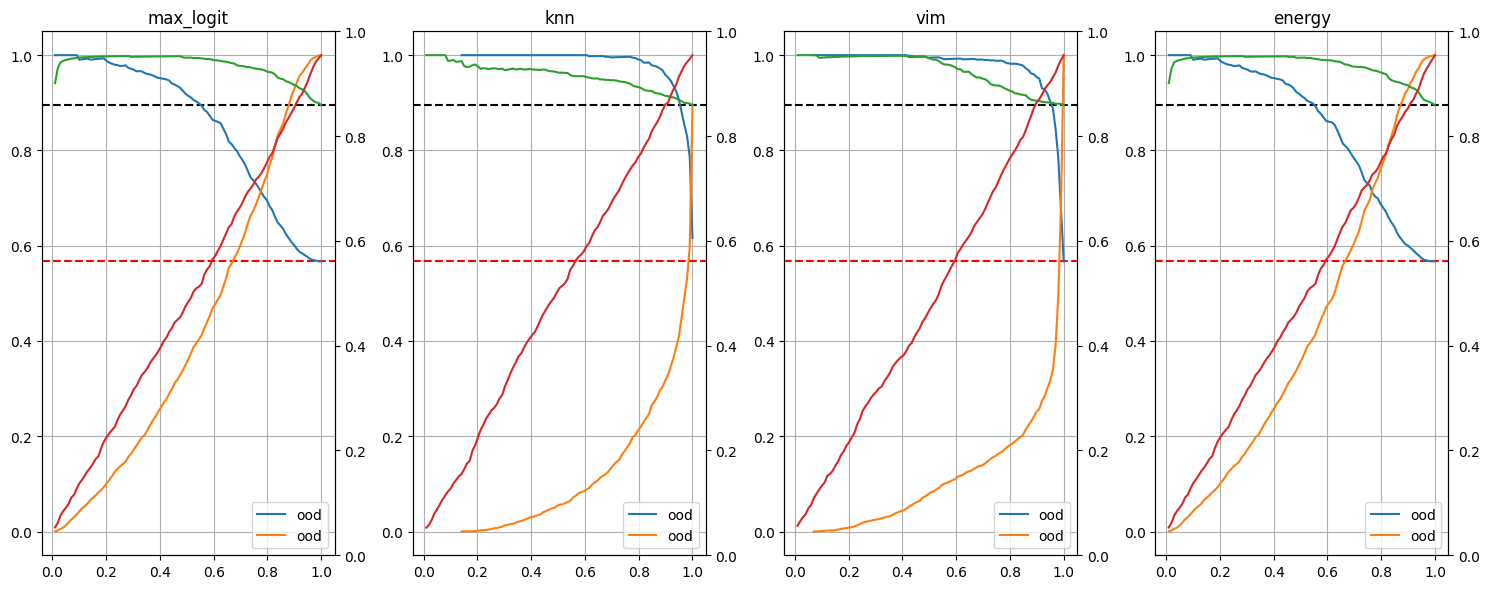

In [20]:
from competence_estimation.metrics import compute_curves
fig, ax = plt.subplots(1, len(score_functions),
    figsize =(15, 6),
    tight_layout = True)

test_domain = 2
dataset='TerraIncognita'
algorithm = 'ERM'

score_functions = ['max_logit', 'knn', 'vim', 'energy']#, 'HBOS']
for test_domain in range(1):

    for ep, p in  enumerate([0.]):
        for ec, score_function_name in enumerate(score_functions):
            ax2 = ax[ ec].twinx()
            print(ep,ec, test_domain)
            result = results_scores[score_function_name][dataset][algorithm][test_domain][p]
            scores_ood = result['scores_ood_test']
            scores_iid_val =  result['scores_iid_val']
            scores_iid_test =  result['scores_iid_test']
            
            if score_function_name  == 'max_softmax':
                scores_ood +=2
                scores_iid_val +=2
                scores_iid_test +=2

            n  = scores_ood.shape[0]-  int(p * scores_ood.shape[0])
            iid_train, iid_val, iid_test, ood_test = load_data(
                algorithm, dataset, test_domain, data_dir, fast=False
            )
            bins=np.histogram(np.hstack((scores_ood,scores_iid_val)), bins=25)[1] #get the bin edges
            true_false_ood = (torch.from_numpy(ood_test[1]).argmax(1)  == torch.from_numpy(ood_test[2]))[:n]
            true_false_ood_open = (torch.from_numpy(ood_test[1]).argmax(1)  == torch.from_numpy(ood_test[2]))#[:n]

            true_false_iid = (torch.from_numpy(iid_test[1]).argmax(1)  == torch.from_numpy(iid_test[2]))#[:n]
            print(true_false_iid.shape)
            accs_ood = []
            accs_iid = []

            for bin_t in bins:
                remaining_mask_iid = scores_iid_test < bin_t

                remaining_mask_ood = scores_ood[:n] < bin_t
                if  remaining_mask_iid.sum() >10:
                    accs_ood.append(true_false_ood[remaining_mask_ood].sum()/remaining_mask_ood.sum())
                    accs_iid.append(true_false_iid[remaining_mask_iid].sum()/remaining_mask_iid.sum())
 
            ax[ ec].axhline(true_false_ood_open.sum()/true_false_ood_open.shape[0], color='red', linestyle='--')   
            ax[ ec].axhline(true_false_iid.sum()/true_false_iid.shape[0], color='black', linestyle='--')   
            #ax[ ec].axvline(scores_iid_val.max(), color='gray', linestyle='--')   
            x_axis, metric_alpha, fracs = compute_curves(
                scores_iid_val,
                scores_ood,
                ood_test[1],
                ood_test[2],
                num_alphas=100,
                alpha_start=0.000,
                alpha_end=1.0,
                metric='acc',
                ece_bins=10,
            )
            ax[ec].plot(x_axis, metric_alpha, label='ood')
            ax[ec].plot(x_axis, fracs, label='ood')
            ax2.set_title(score_function_name)
            
            x_axis, metric_alpha, fracs = compute_curves(
                scores_iid_val,
                scores_iid_test,
                iid_test[1],
                iid_test[2],
                num_alphas=100,
                alpha_start=0.000,
                alpha_end=1.0,
                metric='acc',
                ece_bins=10,
            )
            ax[ec].plot(x_axis, metric_alpha)
            ax[ec].plot(x_axis, fracs)
            #ax[ec].plot(bins[-len(accs_ood):],  accs_ood, color='red')
            #ax[ec].plot(bins[-len(accs_iid):],  accs_iid, color='black')
            #ax[ ec].set_ylim(0.8, 1.01)
            
            #stat='count'
            #sns.histplot(scores_ood[:n],  ax=ax2, alpha=0.5, stat=stat, label='ood',  bins=bins)
            #sns.histplot(scores_ood[n:],  ax=ax2, alpha=0.5, stat=stat, label='open', bins=bins)
            #ax2.axis('off')
            #sns.histplot(scores_iid_val,  ax=ax2, alpha=0.5, stat=stat, label='iid',  bins=bins)
            #ax[ep,ec].axvline(scores_ood.mean())        
            ax[ec].grid()
            ax[ec].legend()


#ax[0,0].legend()

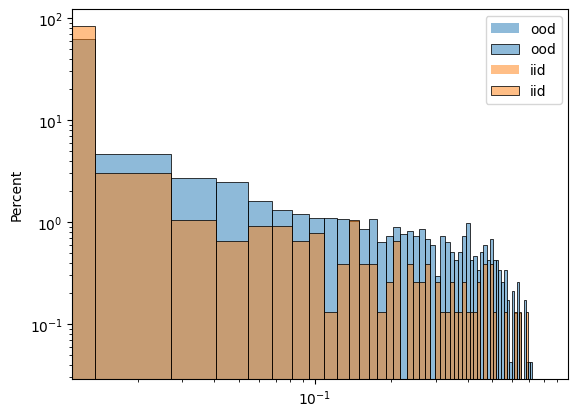

In [191]:
## Log axis
result = results_scores['max_softmax'][dataset][algorithm][test_domain][p]
scores_ood = result['scores_ood_test'] +1
scores_iid_val =  result['scores_iid_val'] +1
scores_iid_test =  result['scores_iid_test'] +1
bins=np.histogram(np.hstack((scores_ood,scores_iid_val)), bins=60)[1] #get the bin edges

sns.histplot(scores_ood[:n], alpha=0.5, stat='percent', label='ood',  bins=bins)
sns.histplot(scores_iid_val, alpha=0.5, stat='percent', label='iid',  bins=bins)
plt.xscale('log')
plt.yscale('log')

plt.legend()
#plt.gca().xscale('log')


# Histogram  in OOD data:  Correct vs.  Incorrect vs. Open World

max_logit 0 OfficeHome torch.Size([2433]) (2433,)
3041 608
knn 0 OfficeHome torch.Size([2433]) (2433,)
3041 608
vim 0 OfficeHome torch.Size([2433]) (2433,)
3041 608
energy 0 OfficeHome torch.Size([2433]) (2433,)
3041 608
HBOS 0 OfficeHome torch.Size([2433]) (2433,)
3041 608
max_logit 1 OfficeHome torch.Size([4377]) (2128,)
2660 532


IndexError: The shape of the mask [2128] at index 0 does not match the shape of the indexed tensor [4377] at index 0

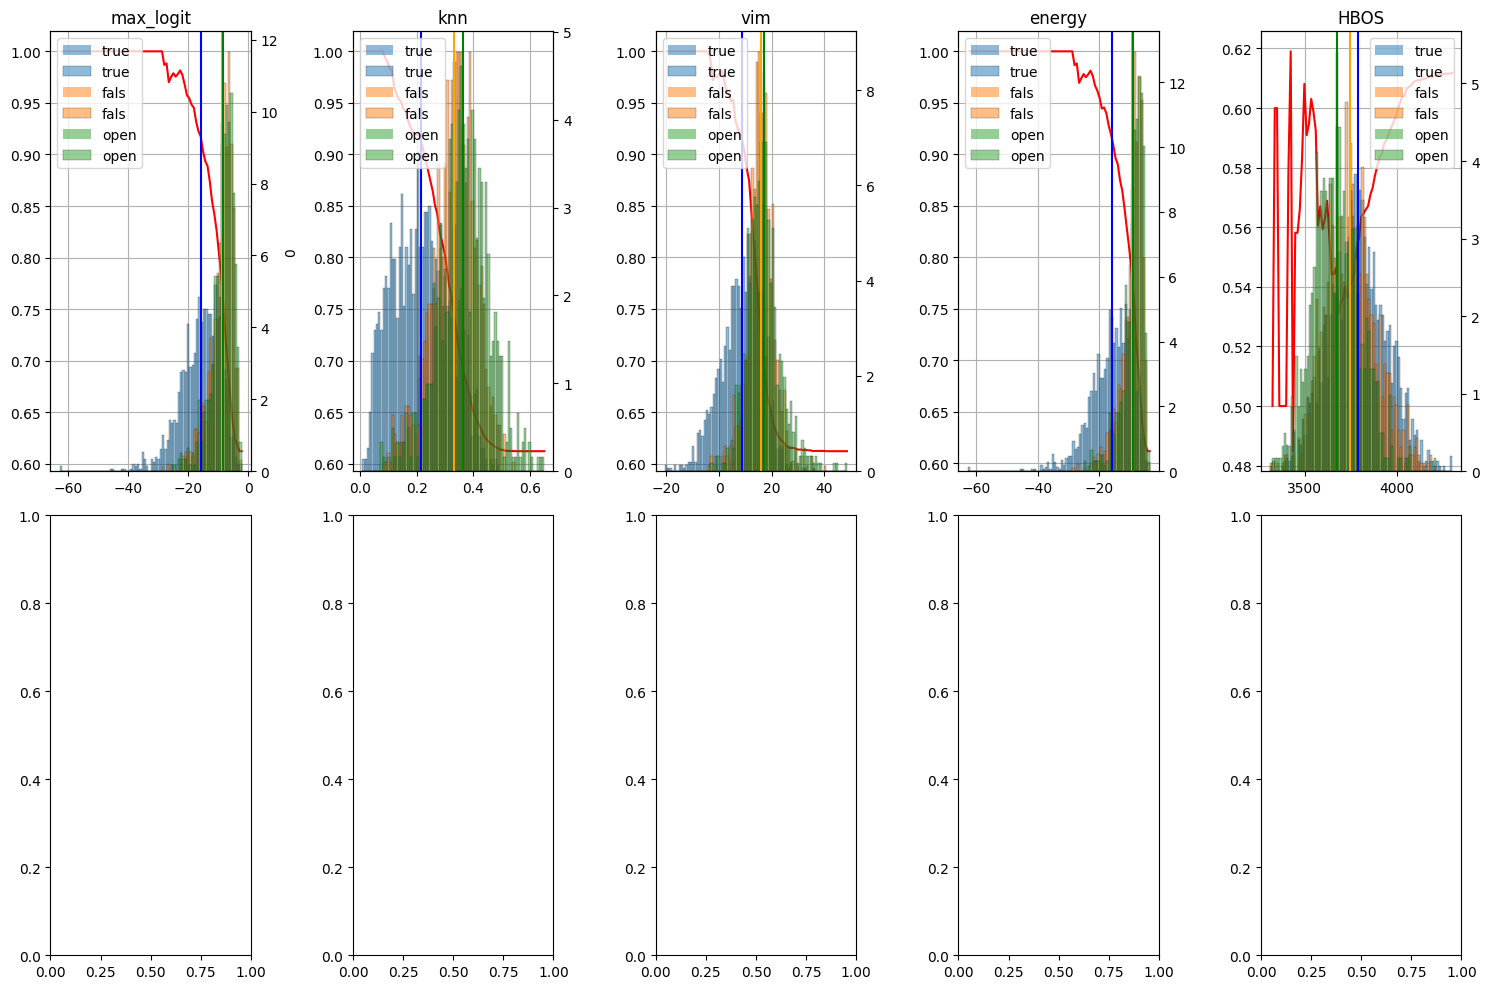

In [192]:
from competence_estimation.metrics import compute_curves
fig, ax = plt.subplots(2, len(score_functions),
    figsize =(15, 10),
    tight_layout = True)

#test_domain = 0
dataset='OfficeHome'
algorithm = 'ERM'

p = 0.2
for test_domain in range(0,4):
    for ec, score_function_name in enumerate(score_functions):

        result = results_scores[score_function_name][dataset][algorithm][test_domain][p]
        scores_ood = result['scores_ood_test']
        scores_iid =  result['scores_iid_val']
        
        n  = scores_ood.shape[0]-  int(p * scores_ood.shape[0])
        #np  =   int(p * scores_ood.shape[0])

        
        iid_train, iid_val, iid_test, ood_test = load_data(
            algorithm, dataset, test_domain, data_dir, fast=False
        )


        true_false_ood = (torch.from_numpy(ood_test[1]).argmax(1)  == torch.from_numpy(ood_test[2]))
        accs = []
        bins=np.histogram(np.hstack((scores_ood)), bins=80)[1] #get the bin edges
        
        print(score_function_name,  test_domain, dataset,  true_false_ood.shape, scores_ood[:n].shape)
        print(scores_ood.shape[0], int(p*scores_ood.shape[0]))

        for bin_t in bins:
            remaining_mask = scores_ood[:n] < bin_t
            #print(remaining_mask.shape)
            accs.append(true_false_ood[remaining_mask].sum()/remaining_mask.sum())
        
        ax2 = ax[test_domain, ec].twinx()
        ax[test_domain, ec].plot(bins,  np.array(accs), color='red')

        
        mask = torch.from_numpy(ood_test[1]).argmax(1) == torch.from_numpy(ood_test[2])
        sns.histplot(scores_ood[:n][mask],  ax=ax2, alpha=0.5, stat='percent', label='true',  bins=bins)
        sns.histplot(scores_ood[:n][~mask],  ax=ax2, alpha=0.5, stat='percent', label='fals',  bins=bins)

        sns.histplot(scores_ood[n:],  ax=ax2, alpha=0.5, stat='percent', label='open', bins=bins)

        #sns.histplot(scores_iid,  ax=ax[ep,ec], alpha=0.5, stat='percent', label='iid',  bins=bins)
        ax2.axvline(scores_ood[:n][mask].mean(), color='blue')   
        ax2.axvline(scores_ood[:n][~mask].mean(), color='orange')        
        ax2.axvline(scores_ood[n:].mean(), color='green')        
        
        
        #ax2.grid()
        ax[test_domain, ec].grid()

        if  test_domain  == 0:
            ax2.legend()
            ax2.set_title(score_function_name)
        if ec ==  0:
            ax2.set_ylabel(str(test_domain))
        else:
            ax2.set_ylabel("")

        


## G (alpha)

In [ ]:
def mix_open(features_ood, logits_ood, features_open, logits_open, percentage=0.5):
    n = features_ood.shape[0]
    n_open= int(n*percentage / (1-percentage))#int(n*percentage)
    if n_open <= features_open.shape[0]:
        pass
        #print(f"Only {n_open/n} achieved ")
    else:
        n = int(features_open.shape[0]* ((1-percentage)/percentage))
        #n=500
        #n=100
        
    idx = torch.randperm(features_open.shape[0])
    features_open = features_open[idx]
    #print(n, n_open, features_open.shape)
    features_out = np.concatenate( ( features_ood[:n], features_open[:n_open]))
    logits_out = np.concatenate( (logits_ood[:n], logits_open[:n_open]))
    labels_out = torch.cat((ood_test[2][:n], torch.ones(logits_open[:n_open].shape[0]) -2), 0)

    return features_out, logits_out, labels_out
    

In [ ]:
from metrics import compute_curves
from sklearn.metrics import auc

fig, ax = plt.subplots(3, len(configs),
    figsize =(15, 10),
    tight_layout = True)

dataset = 'PACS'
test_domain = 1
p=0.0#25
#score_function = 'max_softmax'
for e,  conf  in enumerate(configs):
    print(conf)
    conf_key = myHash(str(list(conf.values())))
    score_function = conf['score_fct']
    #labels_open = torch.from_numpy(np.load(data_dir +'/'+dataset+'/' + f"test_env_{test_domain}/{alg_cons}_labels_open_world.npy"))

    iid_train, iid_val, iid_test, ood_test = load_data(alg_cons, dataset, test_domain, data_dir, fast=False)
    #print((labels_open).view(-1).unique())
    features_open = np.load(data_dir +'/'+dataset+'/' + f"test_env_{test_domain}/{alg_cons}_features_open_world.npy")
    logits_open = np.load(data_dir +'/'+dataset+'/' + f"test_env_{test_domain}/{alg_cons}_logits_open_world.npy")
    ax[0, e].set_title(score_function)
    ax[1,e].grid()
    ax[0,e].grid()
    ax[2,e].grid()

    for p in percentages:
        features_out, logits_out, labels_out = mix_open(ood_test[0], ood_test[1], features_open, logits_open, percentage=p)
        features_out = torch.tensor(features_out)
        logits_out = torch.tensor(logits_out)

        scores_iid = results_scores[conf_key][score_function][p][dataset][alg_cons][test_domain]['scores_iid_val']
        scores_ood  = results_scores[conf_key][score_function][p][dataset][alg_cons][test_domain]['scores_ood_test']

        #sns.histplot(scores_ood[labels_out!=-1], alpha=0.5, label='ood', bins=120, stat='percent', ax=ax[0, e])
        #sns.histplot(scores_ood[labels_out==-1], alpha=0.5, label='open', bins=120, stat='percent', ax=ax[0, e])

        x_axis, metric_alpha, fracs =compute_curves(scores_iid, scores_ood,  logits_out, labels_out,num_alphas=1000, alpha_start=0.000,alpha_end=1.0, metric='acc')
        #print(len(x_axis))
        ax[0,e].plot(x_axis, metric_alpha, label=p)
        ax[1,e].plot(x_axis, fracs, label=p)
        ax[2, e].plot(fracs, metric_alpha, label=p)
        ax[0,e].set_ylim(0.7, 1.01)
        ax[2,e].set_ylim(0.7, 1.01)


        #print(score_function, auc(x_axis, metric_alpha), fracs[0], fracs[-1])
ax[1,0].legend()
ax[2,0].legend()
ax[0,0].legend()


# Which iid feature is  predictive?

ValueError: Could not interpret value `ausc_alpha_iid_shifted` for parameter `x`

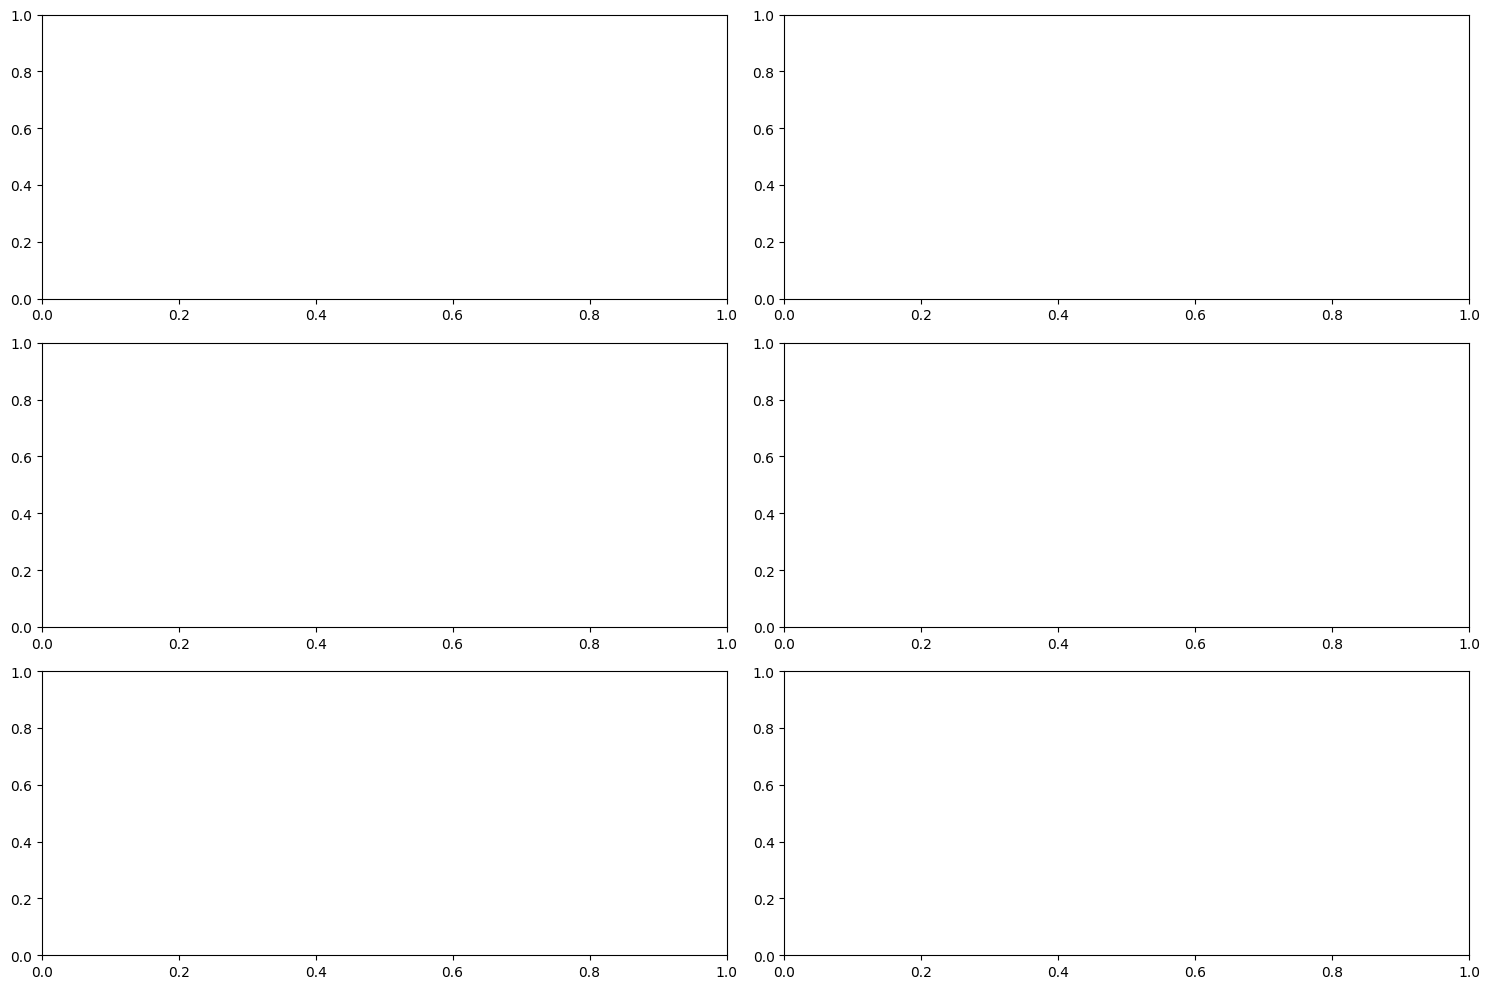

In [73]:
fig, ax = plt.subplots(3, 2,
    figsize =(15, 10),
    tight_layout = True)

#df= df[df['config']!='mahalanobis6']

sns.scatterplot(x="ausc_alpha_iid_shifted", y="ausc_alpha_ood_test_shifted",data=df,  ax=ax[0,0], hue='score_function')
ax[0,0].grid()
sns.scatterplot(x="acc_iid_val", y="ausc_alpha_ood_shifted",data=df,  ax=ax[0,1], hue='score_function')
ax[0,1].grid()


sns.scatterplot(x="ausc_alpha_iid_shifted", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[1,0], hue='score_function')
ax[1,0].grid()
sns.scatterplot(x="acc_iid_val", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[1,1], hue='score_function')
ax[1,1].grid()


sns.scatterplot(x="ece_iid_test", y="ausc_ece_ood_alpha_shifted",data=df,  ax=ax[2,0], hue='score_function')
ax[2,0].grid()
sns.scatterplot(x="ece_iid_test", y="ausc_alpha_ood_shifted",data=df,  ax=ax[2,1], hue='score_function')
ax[2,1].grid()

In [ ]:
# 